Datos cargados correctamente

=== Distribución de clases después de SMOTE ===
weather
2    455
1    455
0    455
3    455
4    455
Name: count, dtype: int64

Modelo entrenado correctamente

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       185
           1       1.00      0.96      0.98       188
           2       0.00      0.00      0.00         7
           3       0.12      1.00      0.22         1
           4       0.32      0.15      0.20        60

    accuracy                           0.76       441
   macro avg       0.44      0.58      0.44       441
weighted avg       0.79      0.76      0.77       441


=== Matriz de Confusión ===


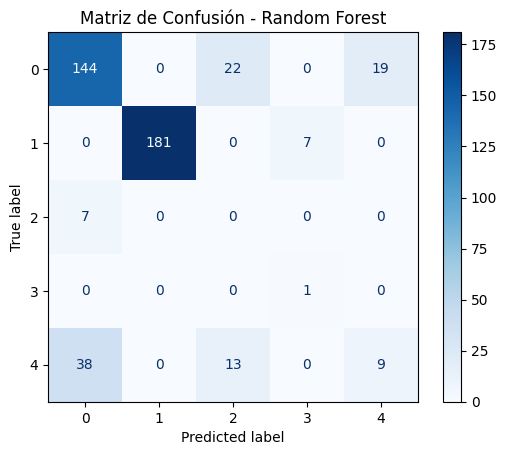

In [ ]:

# 1. Importar librerías necesarias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# 2. Cargar datasets

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
print("Datos cargados correctamente")


# 3. Separar variables independientes (X) y dependientes (y)

X_train = train.drop("weather", axis=1)
y_train = train["weather"]

X_test = test.drop("weather", axis=1)
y_test = test["weather"]


# 4. Aplicar SMOTE para balancear clases

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\n=== Distribución de clases después de SMOTE ===")
print(pd.Series(y_train_res).value_counts())


# 5. Entrenar el modelo Random Forest

modelo = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

modelo.fit(X_train_res, y_train_res)
print("\nModelo entrenado correctamente")


# 6. Predicción

y_pred = modelo.predict(X_test)


# 7. Evaluación del modelo

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Matriz de Confusión ===")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()




/tmp/ipython-input-1652218606.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette='viridis')


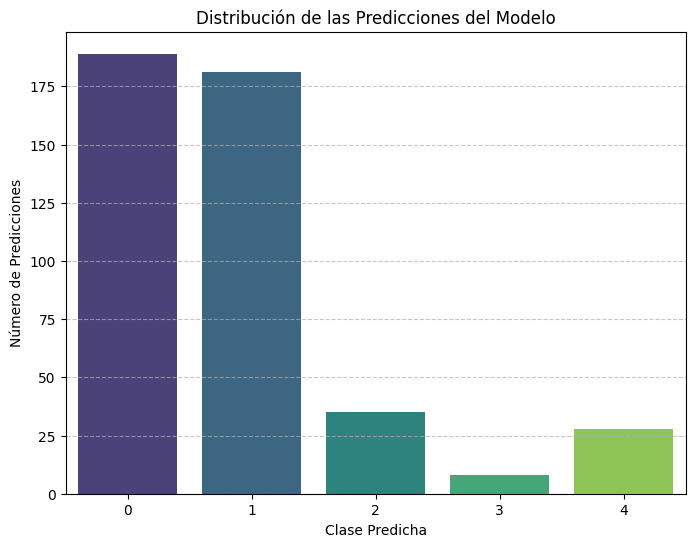

In [ ]:
import seaborn as sns

# Convertir y_pred a una serie de pandas para facilitar el conteo y graficado
y_pred_series = pd.Series(y_pred)

# Contar la ocurrencia de cada predicción
pred_counts = y_pred_series.value_counts().sort_index()

# Graficar la distribución de las predicciones
plt.figure(figsize=(8, 6))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette='viridis')
plt.title('Distribución de las Predicciones del Modelo')
plt.xlabel('Clase Predicha')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("\n=== Conteo de Predicciones del Modelo ===")
print(pred_counts)


=== Conteo de Predicciones del Modelo ===
0    189
1    181
2     35
3      8
4     28
Name: count, dtype: int64


/tmp/ipython-input-3490867658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=test, palette='viridis')


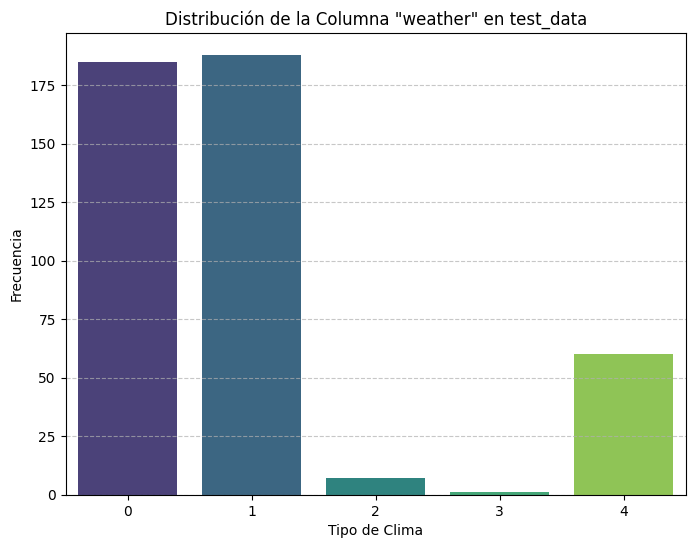

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=test, palette='viridis')
plt.title('Distribución de la Columna "weather" en test_data')
plt.xlabel('Tipo de Clima')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("\n=== Conteo de valores de 'weather' en test_data ===")
print(test['weather'].value_counts())


=== Conteo de valores de 'weather' en test_data ===
weather
1    188
0    185
4     60
2      7
3      1
Name: count, dtype: int64


In [ ]:
print("\n--- Realizar nuevas predicciones ---")
print("Introduce 'salir' en cualquier momento para terminar.\n")

while True:
    try:
        precipitacion_str = input("Introduce el valor para precipitation (mm): ")
        if precipitacion_str.lower() == 'salir':
            break
        precipitacion = float(precipitacion_str)

        temp_max_str = input("Introduce el valor para temp_max (C): ")
        if temp_max_str.lower() == 'salir':
            break
        temp_max = float(temp_max_str)

        temp_min_str = input("Introduce el valor para temp_min (C): ")
        if temp_min_str.lower() == 'salir':
            break
        temp_min = float(temp_min_str)

        wind_str = input("Introduce el valor para wind (m/s): ")
        if wind_str.lower() == 'salir':
            break
        wind = float(wind_str)

        # Crear un DataFrame con los nuevos datos
        # Asegúrate de que los nombres de las columnas coincidan con X_train
        datos_nuevos = pd.DataFrame([{
            'precipitation': precipitacion,
            'temp_max': temp_max,
            'temp_min': temp_min,
            'wind': wind
        }])

        # Realizar la predicción
        prediccion = modelo.predict(datos_nuevos)

        print(f"\nLa predicción del clima para estos datos es: {prediccion[0]}")
        print("--------------------------------------------------\n")

    except ValueError:
        print("Entrada inválida. Por favor, asegúrate de introducir números o 'salir'.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

print("Bucle de predicción terminado.")